In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('..')

from config import load_data

In [2]:
data_dir = "./data/"
target_variable = 'Q_Kalltveit'

In [3]:
ld = load_data(data_dir = data_dir, target_variable = target_variable)
data = ld.get_raw_data()

In [4]:
# Rename columns to be more user-friendly
data = data.rename(columns={
    'Vindhastighet Nilsebu': 'Wind Speed Nilsebu',
    'Lufttemp. Nilsebu': 'Air Temperature Nilsebu',
    'Vindretning Nilsebu': 'Wind Direction Nilsebu',
    'RelHum Nilsebu': 'Relative Humidity Nilsebu',
    'Vannstand Lyngsåna': 'Water Level Lyngsåna',
    'Vanntemp. Hiafossen': 'Water Temperature Hiafossen',
    'Vannstand Hiafossen': 'Water Level Hiafossen',
    'Lufttemp Fister': 'Air Temperature Fister',
    'Nedbør Fister': 'Precipitation Fister',
    'Q_Lyngsvatn_overlop': 'Flow Lyngsvatn Overflow',
    'Q_tapping': 'Flow Tapping',
    'Vannstand Kalltveit': 'Water Level Kalltveit',
    'Q_Kalltveit': 'Flow Kalltveit',
    'Vanntemp. Kalltveit kum': 'Water Temperature Kalltveit Kum',
    'Nedbør Nilsebu': 'Precipitation Nilsebu',
    'Vanntemp. Hiavatn': 'Water Temperature Hiavatn',
    'Vannstand Hiavatn': 'Water Level Hiavatn',
    'Vanntemp. Musdalsvatn': 'Water Temperature Musdalsvatn',
    'Vannstand Musdalsvatn': 'Water Level Musdalsvatn',
    'Vanntemp. Musdalsvatn nedstrøms': 'Water Temperature Musdalsvatn Downstream',
    'Vannstand Musdalsvatn nedstrøms': 'Water Level Musdalsvatn Downstream',
    'Vanntemp. Viglesdalsvatn': 'Water Temperature Viglesdalsvatn',
    'Vannstand Viglesdalsvatn': 'Water Level Viglesdalsvatn'
})

In [5]:
def get_correlation_matrix(data):
    # Calculate the partial correlation matrix
    corr_matrix = data.corr()
    partial_corr_matrix = pd.DataFrame(np.zeros_like(corr_matrix), columns=corr_matrix.columns, index=corr_matrix.index)
    for i in range(len(partial_corr_matrix.columns)):
        for j in range(i+1, len(partial_corr_matrix.index)):
            control_variables = [x for x in corr_matrix.index if x not in [partial_corr_matrix.index[j], partial_corr_matrix.columns[i]]]
            partial_corr = pearsonr(data[partial_corr_matrix.index[j]] - data[control_variables].mean(axis=1), data[partial_corr_matrix.columns[i]] - data[control_variables].mean(axis=1))[0]
            partial_corr_matrix.iloc[j, i] = partial_corr
            partial_corr_matrix.iloc[i, j] = partial_corr

    # Plot the partial correlation matrix as a heatmap
    plt.figure(figsize=(10,8))
    sns.heatmap(partial_corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
    plt.title('Partial Correlation Matrix of Hydrological Inflow Variables')
    plt.show()

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Wind Speed Nilsebu,62955.0,-11.359088,373.072147,-7999.000000,5.200000,6.100000,7.500000,22.100000
Air Temperature Nilsebu,63102.0,3.636294,6.919231,-20.700000,-0.800000,3.100000,8.600000,27.200000
Wind Direction Nilsebu,63079.0,213.033360,113.673486,-99.900000,133.200000,215.600000,325.900000,360.000000
Relative Humidity Nilsebu,63079.0,64.444010,43.178686,-99.900000,51.500000,82.600000,96.700000,99.700000
Water Level Lyngsåna,50380.0,0.735474,0.182148,0.331000,0.606000,0.714000,0.847000,1.494000
Water Temperature Hiafossen,50192.0,6.242513,5.352072,-0.200000,1.200000,4.900000,11.200000,19.900000
Water Level Hiafossen,50192.0,1.078482,0.158591,0.849000,0.972000,1.029000,1.136000,2.017000
Air Temperature Fister,63288.0,8.811811,5.909750,-11.800000,4.600000,8.400000,13.200000,32.400000
Precipitation Fister,63288.0,0.215365,0.746016,0.000000,0.000000,0.000000,0.000000,21.598444
Flow Lyngsvatn Overflow,63286.0,0.035255,0.742100,0.000000,0.000000,0.000000,0.000000,22.397800


In [7]:
data.count().sort_values()

GR_WAT_HBV                                  29595
SOIL_WAT_HBV                                29595
Evap_HBV                                    29595
SNOW_SWE_HBV                                29595
SNOW_MELT_HBV                               29595
Q_HBV_mean                                  31241
Water Level Hiavatn                         45836
Water Temperature Hiavatn                   45837
Water Level Viglesdalsvatn                  45858
Water Temperature Viglesdalsvatn            45858
Water Level Musdalsvatn Downstream          45955
Water Temperature Musdalsvatn Downstream    45955
Water Temperature Musdalsvatn               45978
Water Level Musdalsvatn                     45978
Water Temperature Hiafossen                 50192
Water Level Hiafossen                       50192
Vanntemp. Kalltveit elv                     50316
Water Level Lyngsåna                        50380
Wind Speed Nilsebu                          62955
Wind Direction Nilsebu                      63079


The following is the variables with the number of values:

| Variable                                 | Count   |
| ---------------------------------------- | ------- |
| Q_Lyngsaana                              | 63288   |
| Q_Kalltveit_uten_tapping                 | 63288   |
| TEMP_HBV                                 | 63288   |
| Precipitation Nilsebu                    | 63288   |
| PRECIP_HBV                               | 63288   |
| Q_HBV                                    | 63288   |
| Precipitation Fister                     | 63288   |
| Flow Kalltveit                           | 63288   |
| Air Temperature Fister                   | 63288   |
| Datetime                                 | 63288   |

The following variables have some missing values:

| Variable                                 | Count   |
| ---------------------------------------- | ------- |
| Flow Tapping                             | 63286   |
| Flow Lyngsvatn Overflow                  | 63286   |

The following variables have varying values:

| Variable                                 | Count   |
| ---------------------------------------- | ------- |
| Wind Speed Nilsebu                       | 62955   |
| Wind Direction Nilsebu                   | 63079   |
| Relative Humidity Nilsebu                | 63079   |
| Air Temperature Nilsebu                  | 63102   |
| Water Temperature Kalltveit Kum          | 63269   |
| Water Level Kalltveit                    | 63274   |
| Vanntemp. Lyngsåna                       | 63283   |

The following variables have varying water varables:

| Variable                                 | Count   |
| ---------------------------------------- | ------- |
| Water Level Hiavatn                      | 45836   |
| Water Temperature Hiavatn                | 45837   |
| Water Level Viglesdalsvatn               | 45858   |
| Water Temperature Viglesdalsvatn         | 45858   |
| Water Level Musdalsvatn Downstream       | 45955   |
| Water Temperature Musdalsvatn Downstream | 45955   |
| Water Temperature Musdalsvatn            | 45978   |
| Water Level Musdalsvatn                  | 45978   |
| Water Temperature Hiafossen              | 50192   |
| Water Level Hiafossen                    | 50192   |
| Vanntemp. Kalltveit elv                  | 50316   |
| Water Level Lyngsåna                     | 50380   |

HBV simulation data:

| Variable                                 | Count   |
| ---------------------------------------- | ------- |
| GR_WAT_HBV                               | 29595   |
| SOIL_WAT_HBV                             | 29595   |
| Evap_HBV                                 | 29595   |
| SNOW_SWE_HBV                             | 29595   |
| SNOW_MELT_HBV                            | 29595   |
| Q_HBV_mean                               | 31241   |


In [8]:
var_with_max_count = ["Q_Lyngsaana", "Q_Kalltveit_uten_tapping", "TEMP_HBV", "Precipitation Nilsebu", "PRECIP_HBV", "Q_HBV", "Precipitation Fister", "Flow Kalltveit", "Air Temperature Fister", "Datetime"]                                  

In [9]:
data[var_with_max_count].describe()

,Q_Lyngsaana,Q_Kalltveit_uten_tapping,TEMP_HBV,Precipitation Nilsebu,PRECIP_HBV,Q_HBV,Precipitation Fister,Flow Kalltveit,Air Temperature Fister
count,63288.000000,63288.000000,63288.000000,63288.000000,63288.000000,63288.000000,63288.000000,63288.000000,63288.000000
mean,2.259291,5.589386,4.070589,0.326407,0.281887,5.353519,0.215365,6.509245,8.811811
std,3.344124,7.764969,6.919953,1.237064,0.821245,6.811531,0.746016,7.565526,5.909750
min,0.000000,0.000000,-20.196868,0.000000,0.000000,0.005526,0.000000,0.000000,-11.800000
25%,0.469784,1.299561,-0.383786,0.000000,0.000000,1.829147,0.000000,2.683190,4.600000
50%,1.058914,3.496592,3.577349,0.000000,0.000000,3.436150,0.000000,4.097010,8.400000
75%,2.529453,6.673359,9.052494,0.098519,0.137533,6.331031,0.000000,7.141195,13.200000
max,55.227400,110.256270,27.716214,30.000000,26.323696,89.827721,21.598444,110.256270,32.400000


Notes from the data:
- The maximum value for Q_Lyngsaana is much higher than the 75th percentile value, which may indicate the presence of outliers or extreme events in the data.
- The maximum value for Q_Kalltveit_uten_tapping is also much higher than the 75th percentile value.
- The minimum value for Air Temperature Fister is negative (-11.8), which may indicate an error in the data or a problem with the measurement equipment
- The maximum value for Precipitation Fister is much higher than the 75th percentile value, which may indicate the presence of outliers or extreme events in the data.

In [10]:
var_with_almost_max_count = ["Flow Tapping", "Flow Lyngsvatn Overflow"]

In [11]:
data[data[var_with_almost_max_count].isna().any(axis=1)]

,Datetime,Wind Speed Nilsebu,Air Temperature Nilsebu,Wind Direction Nilsebu,Relative Humidity Nilsebu,Water Level Lyngsåna,Water Temperature Hiafossen,Water Level Hiafossen,Air Temperature Fister,Precipitation Fister,...,SNOW_MELT_HBV,SNOW_SWE_HBV,Evap_HBV,SOIL_WAT_HBV,GR_WAT_HBV,Q_Kalltveit_uten_tapping,Q_HBV_mean,Q_Lyngsaana,Vanntemp. Lyngsåna,Vanntemp. Kalltveit elv
35973,2019-02-07 21:00:00,7.6,-1.5,93.4,99.1,0.499,0.4,0.963,4.8,0.0,...,0.003359,174.627315,0.0,82.774333,4.735968,0.366822,0.469942,0.250995,0.6,1.4
35974,2019-02-07 22:00:00,6.2,-1.3,56.4,99.6,0.503,0.4,0.964,4.4,0.0,...,0.019787,174.605838,0.0,82.774925,4.725312,0.372462,0.466138,0.259335,0.6,1.4


In [12]:
data[var_with_almost_max_count].iloc[35970:35980]

,Flow Tapping,Flow Lyngsvatn Overflow
35970,1.592862,0.0
35971,1.591902,0.0
35972,1.591902,0.0
35973,NaN,NaN
35974,NaN,NaN
35975,1.588988,0.0
35976,1.588988,0.0
35977,1.587701,0.0
35978,1.587780,0.0
35979,1.586323,0.0


- Values can be turned to cero.

In [13]:
var_that_varying = ["Wind Speed Nilsebu", "Wind Direction Nilsebu", "Relative Humidity Nilsebu", "Air Temperature Nilsebu", "Water Temperature Kalltveit Kum", "Water Level Kalltveit", "Vanntemp. Lyngsåna"]

In [14]:
data[var_that_varying].describe()

,Wind Speed Nilsebu,Wind Direction Nilsebu,Relative Humidity Nilsebu,Air Temperature Nilsebu,Water Temperature Kalltveit Kum,Water Level Kalltveit,Vanntemp. Lyngsåna
count,62955.000000,63079.000000,63079.000000,63102.000000,63269.000000,63274.000000,63283.000000
mean,-11.359088,213.033360,64.444010,3.636294,-25.726374,-26.232780,6.402902
std,373.072147,113.673486,43.178686,6.919231,563.037133,517.624893,5.343528
min,-7999.000000,-99.900000,-99.900000,-20.700000,-9999.000000,-9999.000000,-0.773633
25%,5.200000,133.200000,51.500000,-0.800000,4.500000,0.526380,1.415820
50%,6.100000,215.600000,82.600000,3.100000,5.700000,0.579130,5.084766
75%,7.500000,325.900000,96.700000,8.600000,7.762500,0.673130,11.600000
max,22.100000,360.000000,99.700000,27.200000,15.843750,2.275520,19.400000


In [15]:
data[data[var_that_varying].isna().any(axis=1)][35:]

,Datetime,Wind Speed Nilsebu,Air Temperature Nilsebu,Wind Direction Nilsebu,Relative Humidity Nilsebu,Water Level Lyngsåna,Water Temperature Hiafossen,Water Level Hiafossen,Air Temperature Fister,Precipitation Fister,...,SNOW_MELT_HBV,SNOW_SWE_HBV,Evap_HBV,SOIL_WAT_HBV,GR_WAT_HBV,Q_Kalltveit_uten_tapping,Q_HBV_mean,Q_Lyngsaana,Vanntemp. Lyngsåna,Vanntemp. Kalltveit elv
1667,2015-03-11 11:00:00,NaN,NaN,NaN,NaN,0.949,1.1,1.169,6.5,0.000000,...,NaN,NaN,NaN,NaN,NaN,10.138380,NaN,4.999422,1.600000,NaN
1716,2015-03-13 12:00:00,2.200000,4.4,168.4,42.3,NaN,1.4,1.018,9.9,0.000000,...,NaN,NaN,NaN,NaN,NaN,5.219370,NaN,2.367884,NaN,NaN
6986,2015-10-19 02:00:00,NaN,NaN,NaN,NaN,0.412,6.0,0.980,4.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.118662,3.600000,NaN
7352,2015-11-03 08:00:00,NaN,NaN,NaN,NaN,0.561,6.2,0.950,9.3,0.000000,...,NaN,NaN,NaN,NaN,NaN,0.549282,NaN,0.410173,6.300000,NaN
7354,2015-11-03 10:00:00,NaN,NaN,NaN,NaN,0.563,6.2,0.953,9.3,0.000000,...,NaN,NaN,NaN,NaN,NaN,0.526266,NaN,0.416502,6.400000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59915,2021-11-01 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.6,0.000028,...,0.000000,0.000000,0.027669,77.845670,26.679156,8.203990,8.978151,4.145801,6.613672,7.500
59916,2021-11-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.3,0.099972,...,0.000000,0.000000,0.024946,77.820895,26.294862,8.072180,8.838056,3.991386,6.624609,7.600
60441,2021-11-23 09:00:00,6.133333,NaN,NaN,NaN,NaN,NaN,NaN,6.8,0.200083,...,0.077125,5.184757,0.004566,81.825896,18.052177,6.834360,6.823145,2.738022,4.323438,5.400
62833,2022-03-03 01:00:00,4.700000,-3.3,14.0,69.6,NaN,NaN,NaN,1.7,0.000000,...,0.002721,478.710513,0.000000,84.870938,9.309952,2.461551,2.486219,0.000454,NaN,1.475


In [16]:
data[var_that_varying].iloc[7330:7360]

,Wind Speed Nilsebu,Wind Direction Nilsebu,Relative Humidity Nilsebu,Air Temperature Nilsebu,Water Temperature Kalltveit Kum,Water Level Kalltveit,Vanntemp. Lyngsåna
7330,5.4,348.6,88.3,4.8,7.310,0.51700,6.5
7331,5.6,352.7,83.7,5.6,7.310,0.51650,6.5
7332,5.6,344.3,78.9,6.9,7.310,0.51675,6.5
7333,5.2,336.3,76.3,7.4,7.310,0.51600,6.6
7334,5.3,343.4,71.2,7.7,7.310,0.51575,6.7
7335,5.2,351.5,69.1,6.8,7.310,0.51500,6.7
7336,6.5,332.4,80.6,5.2,7.310,0.51500,6.6
7337,5.9,338.6,79.3,4.7,7.310,0.51500,6.5
7338,5.7,331.0,81.9,4.4,7.310,0.51425,6.4
7339,5.8,347.2,87.5,3.4,7.310,0.51400,6.3


- Wind Speed Nilsebu seem broken. Not to be included. -7999.0 and -99.9 NaN?
- Same with Wind Direction Nilsebu

In [17]:
data[["Relative Humidity Nilsebu", "Air Temperature Nilsebu", "Water Temperature Kalltveit Kum", "Water Level Kalltveit", "Vanntemp. Lyngsåna"]].describe()

,Relative Humidity Nilsebu,Air Temperature Nilsebu,Water Temperature Kalltveit Kum,Water Level Kalltveit,Vanntemp. Lyngsåna
count,63079.000000,63102.000000,63269.000000,63274.000000,63283.000000
mean,64.444010,3.636294,-25.726374,-26.232780,6.402902
std,43.178686,6.919231,563.037133,517.624893,5.343528
min,-99.900000,-20.700000,-9999.000000,-9999.000000,-0.773633
25%,51.500000,-0.800000,4.500000,0.526380,1.415820
50%,82.600000,3.100000,5.700000,0.579130,5.084766
75%,96.700000,8.600000,7.762500,0.673130,11.600000
max,99.700000,27.200000,15.843750,2.275520,19.400000


In [18]:
#TODO: Continue here with checking out the variables

In [19]:
var_with_HBV = ["GR_WAT_HBV", "SOIL_WAT_HBV", "Evap_HBV", "SNOW_SWE_HBV", "SNOW_MELT_HBV", "Q_HBV_mean"]

In [20]:
data[var_with_HBV]

,GR_WAT_HBV,SOIL_WAT_HBV,Evap_HBV,SNOW_SWE_HBV,SNOW_MELT_HBV,Q_HBV_mean
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
63283,12.691728,84.613501,0.000000,452.399884,0.016940,2.401503
63284,12.600009,84.613558,0.000171,452.361058,0.035770,2.366949
63285,12.541249,84.612921,0.001072,452.287223,0.068025,2.341590
63286,12.489559,84.612209,0.001187,452.206589,0.074288,2.324290


In [21]:
var_with_water = ["Water Level Hiavatn", "Water Temperature Hiavatn", "Water Level Viglesdalsvatn", "Water Temperature Viglesdalsvatn", "Water Level Musdalsvatn Downstream", "Water Temperature Musdalsvatn Downstream", "Water Temperature Musdalsvatn", "Water Level Musdalsvatn", "Water Temperature Hiafossen", "Water Level Hiafossen", "Vanntemp. Kalltveit elv", "Water Level Lyngsåna"]

In [22]:
# remove rows with NaN values
data_1 = data[var_with_max_count+var_with_almost_max_count].dropna()

In [23]:
# remove rows with NaN values
data_2 = data[["Flow Kalltveit"]+var_that_varying].dropna()

In [24]:
# remove rows with NaN values
data_3 = data[["Flow Kalltveit"]+var_with_water].dropna()

In [25]:
# remove rows with NaN values
data_4 = data[["Flow Kalltveit"]+var_with_HBV].dropna()

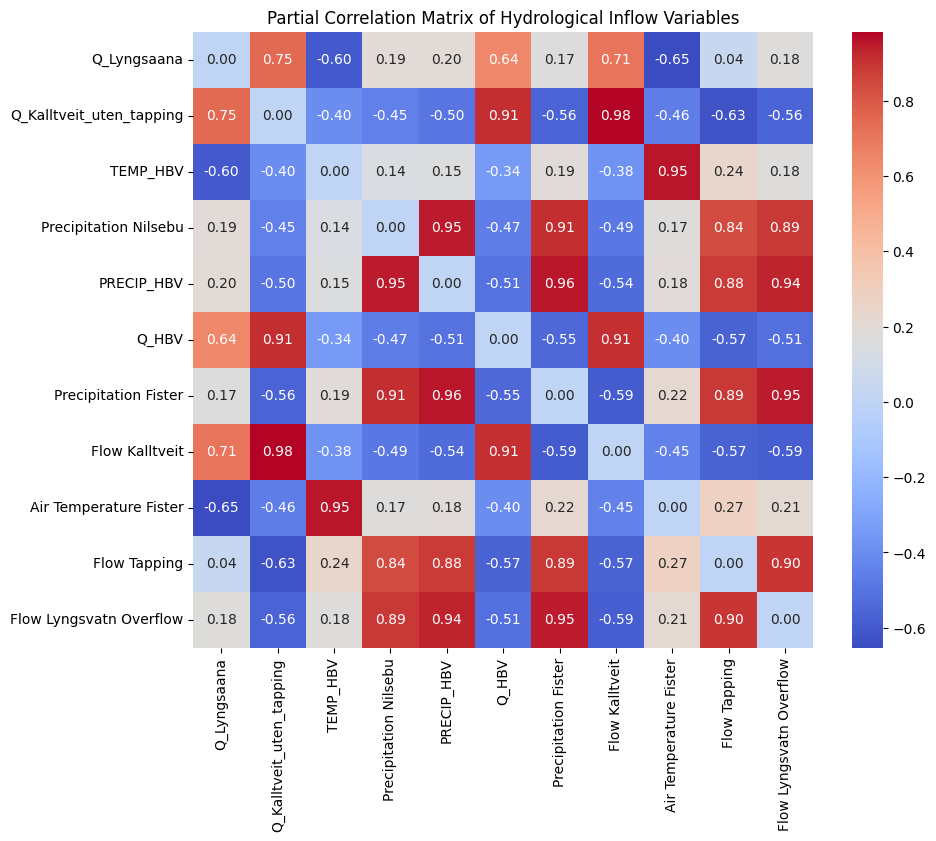

In [26]:
get_correlation_matrix(data_1)

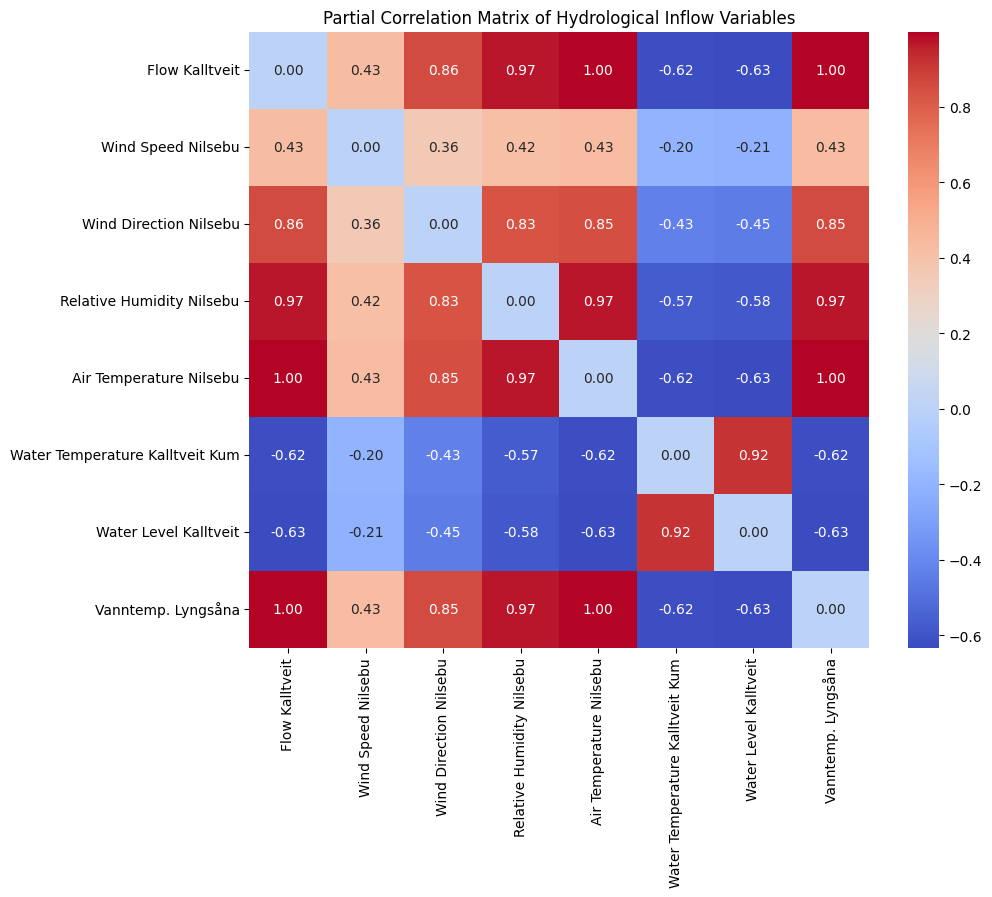

In [27]:
get_correlation_matrix(data_2)

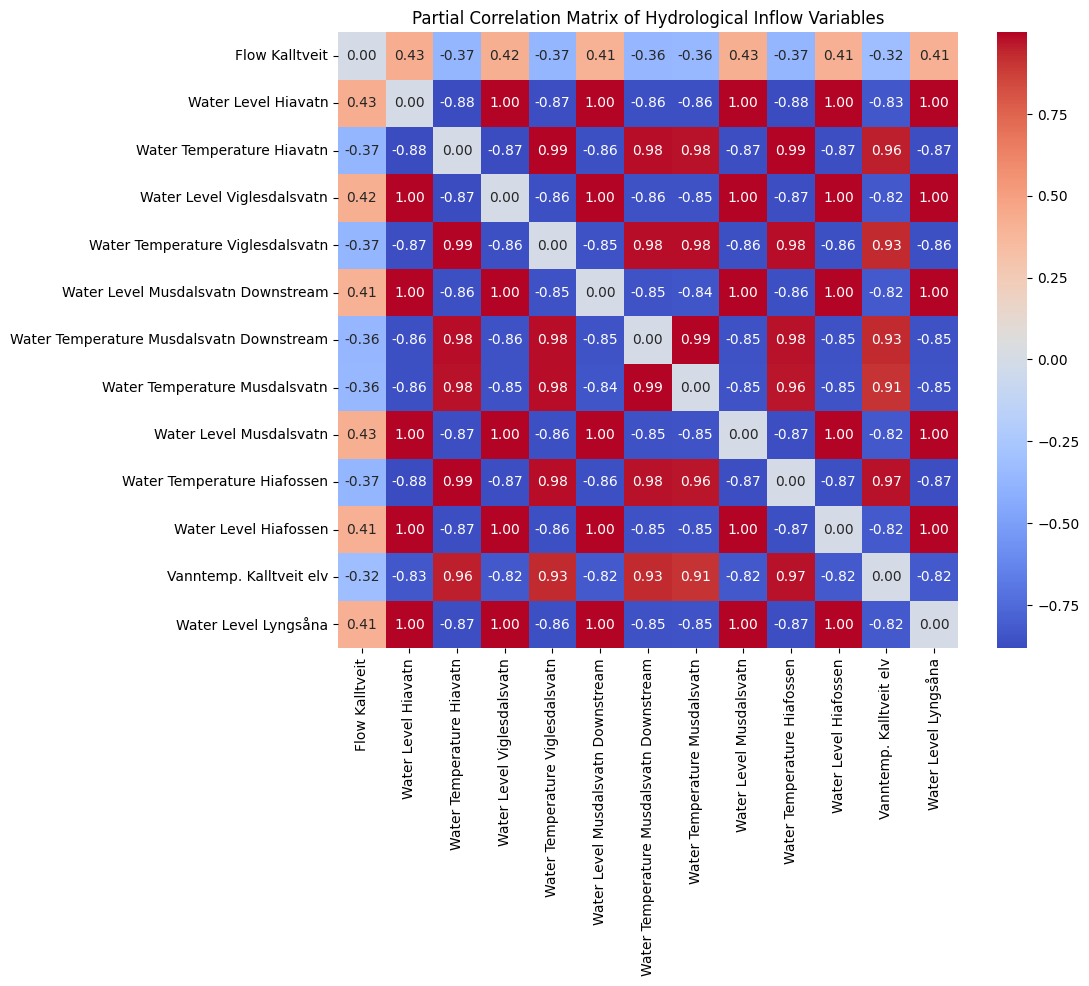

In [28]:
get_correlation_matrix(data_3)

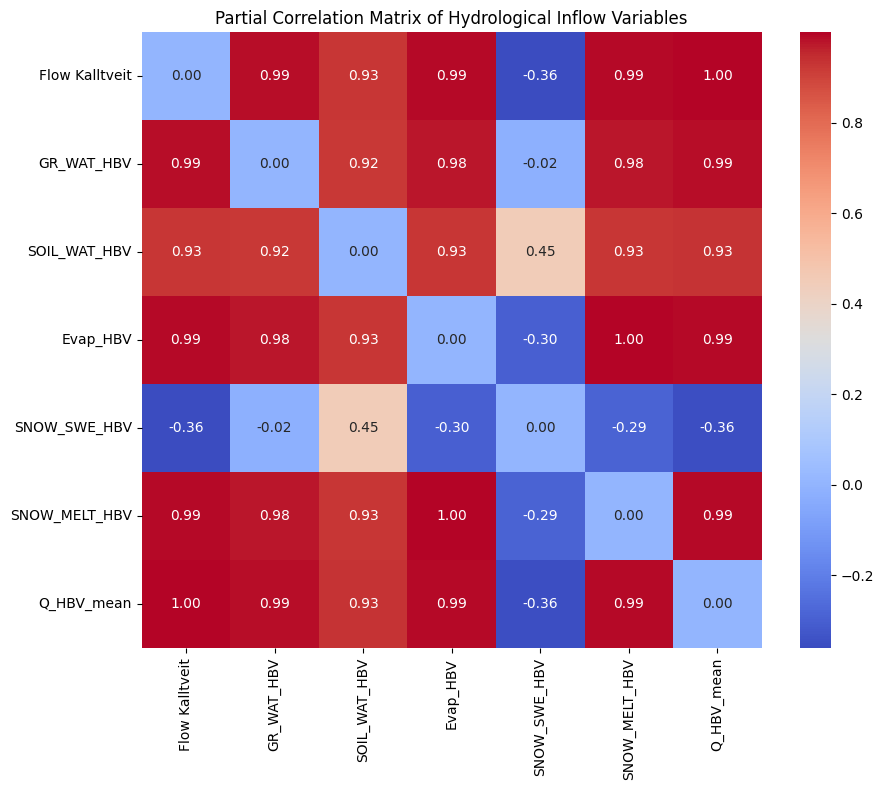

In [29]:
get_correlation_matrix(data_4)